# steps to build a simple linear regression model
1.import libraries

2.load dataset

3.select features and target

4.split the data(training and testing)

5.scale the data(optional) -to standardize features

6.train the model

7.make predictions 

8.evaluate the model

9.visualize results

10.find accuracy of the model


In [66]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [67]:
#loading dataset
df=pd.read_csv('house_price_regression_dataset.csv')

In [68]:
#reading dataset
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [69]:
df.tail()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
995,3261,4,1,1978,2.165110,2,10,701493.997069
996,3179,1,2,1999,2.977123,1,10,683723.160704
997,2606,4,2,1962,4.055067,0,2,572024.023634
998,4723,5,2,1950,1.930921,0,7,964865.298639
999,3268,4,2,1983,3.108790,2,2,742599.253332


In [70]:
df.shape

(1000, 8)

In [71]:
#finding null values
df.isnull().sum()

Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64

In [72]:
#statistical calculation
df.describe()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2815.422000,2.990000,1.973000,1986.550000,2.778087,1.022000,5.615000,6.188610e+05
std,1255.514921,1.427564,0.820332,20.632916,1.297903,0.814973,2.887059,2.535681e+05
min,503.000000,1.000000,1.000000,1950.000000,0.506058,0.000000,1.000000,1.116269e+05
25%,1749.500000,2.000000,1.000000,1969.000000,1.665946,0.000000,3.000000,4.016482e+05
50%,2862.500000,3.000000,2.000000,1986.000000,2.809740,1.000000,6.000000,6.282673e+05
75%,3849.500000,4.000000,3.000000,2004.250000,3.923317,2.000000,8.000000,8.271413e+05
max,4999.000000,5.000000,3.000000,2022.000000,4.989303,2.000000,10.000000,1.108237e+06


In [73]:
#column names
df.columns

Index(['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Year_Built',
       'Lot_Size', 'Garage_Size', 'Neighborhood_Quality', 'House_Price'],
      dtype='object')

In [74]:
#splitting into training and testing
x=df[['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Year_Built',
       'Lot_Size', 'Garage_Size', 'Neighborhood_Quality']]
y=df['House_Price']

In [75]:
# Reset indices to avoid misalignment
x = x.reset_index(drop=True)
y = y.reset_index(drop=True)

In [76]:
# Check shapes
print("x shape:", x.shape)
print("y shape:", y.shape)

x shape: (1000, 7)
y shape: (1000,)


In [77]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [78]:
x_test

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality
521,4012,3,1,2016,2.098092,1,5
737,2310,3,1,1988,1.369622,1,4
740,4708,1,3,1962,1.792970,1,8
660,4932,2,1,1972,4.479598,1,2
411,3646,1,1,1994,3.980987,0,9
...,...,...,...,...,...,...,...
408,3767,5,3,1981,1.520335,2,4
332,616,2,3,1965,3.461372,1,7
208,4491,4,2,1994,3.399155,0,4
613,1858,1,1,1996,4.546672,2,8


In [79]:
y_test

521    9.010005e+05
737    4.945375e+05
740    9.494042e+05
660    1.040389e+06
411    7.940100e+05
           ...     
408    8.245296e+05
332    1.803936e+05
208    9.658167e+05
613    4.336642e+05
78     6.639050e+05
Name: House_Price, Length: 200, dtype: float64

In [80]:
# Verify split
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)


x_train shape: (800, 7)
y_train shape: (800,)


In [81]:
#Scaling the data by standardizing
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#as it is a multiple features we don't need to convert ot into data frame .The conersion is only needed if the dataset set has only one single feature

In [82]:
x_trainscaled=scaler.fit_transform(x_train)
x_testscaled=scaler.transform(x_test)

In [55]:
df.columns

Index(['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Year_Built',
       'Lot_Size', 'Garage_Size', 'Neighborhood_Quality', 'House_Price'],
      dtype='object')

In [83]:
type(x_train)

numpy.ndarray

In [84]:
type(y_train)

pandas.core.series.Series

In [85]:
# Initialize and fit model
regressor = LinearRegression()
regressor.fit(x_train, y_train)



LinearRegression()

In [86]:
# Predictions
y_pred = regressor.predict(x_test)

In [89]:
y_pred_test=regressor.predict(x_test)

In [90]:
# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 101434798.50563647
R^2 Score: 0.9984263636823413


In [92]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [93]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

101434798.50563647
8174.583600006653
10071.484424137112


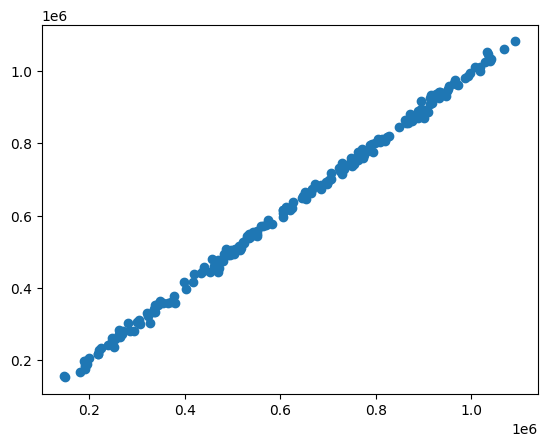

In [94]:
plt.scatter(y_test,y_pred_test)
plt.show()

In [95]:
#residuals

residuals=y_test-y_pred_test
residuals

521    32313.380755
737     4199.613291
740     3737.076440
660     6986.172143
411    17311.242828
           ...     
408     6198.788790
332    13209.159205
208    -9118.708777
613    -6889.594563
78       616.304153
Name: House_Price, Length: 200, dtype: float64

In [96]:
df_results=pd.DataFrame({'Actual':y_test,'Predicted':y_pred_test})
print(df_results)

           Actual     Predicted
521  9.010005e+05  8.686871e+05
737  4.945375e+05  4.903379e+05
740  9.494042e+05  9.456671e+05
660  1.040389e+06  1.033403e+06
411  7.940100e+05  7.766988e+05
..            ...           ...
408  8.245296e+05  8.183308e+05
332  1.803936e+05  1.671845e+05
208  9.658167e+05  9.749354e+05
613  4.336642e+05  4.405538e+05
78   6.639050e+05  6.632887e+05

[200 rows x 2 columns]


In [97]:
r2 = r2_score(y_test, y_pred_test)
print(f"R² Score (Accuracy): {r2:.2%}")

R² Score (Accuracy): 99.84%


In [98]:
mape = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100
accuracy = 100 - mape
print(f"Model Accuracy: {accuracy:.2f}%")

Model Accuracy: 98.34%


In [103]:

input_features = [[3261, 4, 1, 1981, 2.165110	, 2, 10]]

# Scale the input (use the same scaler fitted on training data)
scaled_input = scaler.transform(input_features)

# Predict house price
predicted_price = regressor.predict(scaled_input)
print("Predicted House Price:", predicted_price[0])


Predicted House Price: 856226543.3492912


In [101]:
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [102]:
df.tail()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
995,3261,4,1,1978,2.165110,2,10,701493.997069
996,3179,1,2,1999,2.977123,1,10,683723.160704
997,2606,4,2,1962,4.055067,0,2,572024.023634
998,4723,5,2,1950,1.930921,0,7,964865.298639
999,3268,4,2,1983,3.108790,2,2,742599.253332
